## Nonlinear Constraints

IPOPT also supports nonlinear constraints. This notebook shows examples of design optimizations with nonlinear constraints.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import opti
from doe.design import find_local_max_ipopt

def plot_results_3d(result, surface_func):
    u, v = np.mgrid[0 : 2 * np.pi : 100j, 0 : np.pi : 80j]
    X = np.cos(u) * np.sin(v)
    Y = np.sin(u) * np.sin(v)
    Z = surface_func(X, Y)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, alpha=0.3)
    ax.scatter(
        xs=result["x1"],
        ys=result["x2"],
        zs=result["x3"],
        marker="o",
        s=40,
        color="red",
    )
    ax.set(xlabel="x1", ylabel="x2", zlabel="x3")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

### Example 1: Design inside a cone / nonlinear inequality

In the following example we have three design variables. 
We impose the constraint of all experiments to be contained in the interior of a cone, which corresponds the nonlinear inequality constraint
$\sqrt{x_1^2 + x_2^2} - x_3 \leq 0$.
The optimization is done for a linear model and places the points on the surface of the cone so as to maximize the between them

In [17]:
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearInequality("(x1**2 + x2**2)**0.5 - x3", names=["x1","x2","x3"], jacobian="[x1/(x1**2 + x2**2)**0.5,x2/(x1**2 + x2**2)**0.5,-1]")],
)

result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 100})
result.round(3)

/home/aaron/Documents/doe/doe/design.py:109: UserWarning: Nonlinear constraints were detected. Not all features and checks are supported for this type of constraints.                 Using them can lead to unexpected behaviour. Please make sure to provide jacobians for nonlinear constraints.
  warnings.warn(
/home/aaron/Documents/doe/doe/design.py:145: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(


This is Ipopt version 3.14.10, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      147
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       21
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       21
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        7
        inequality constraints with only lower bounds:        7
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.9253361e-01 0.00e+00 1.97e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

,x1,x2,x3
exp0,0.150,-0.988,1.000
exp1,-0.895,-0.445,1.000
exp2,-0.000,-0.000,0.001
exp3,-0.000,0.000,0.001
exp4,0.984,-0.176,1.000
exp5,-0.697,0.716,1.000
exp6,0.470,0.882,1.000


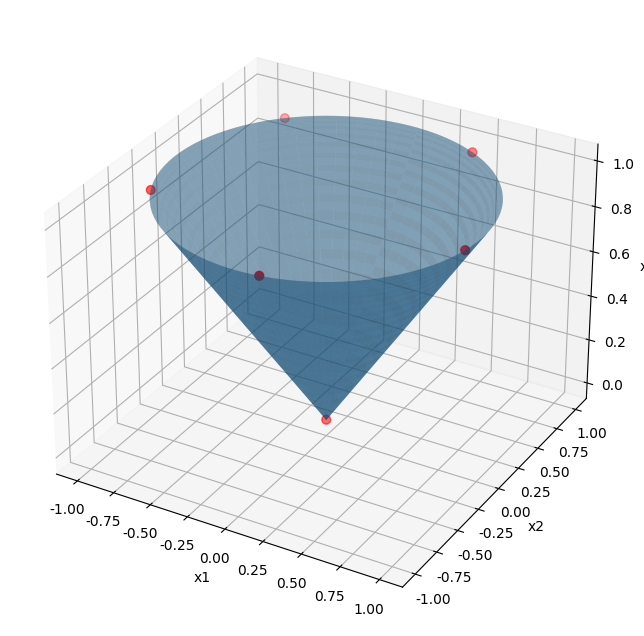

In [18]:
plot_results_3d(result, surface_func=lambda x1, x2: np.sqrt(x1**2 + x2**2))

And the same for a design space limited by an elliptical cone $x_1^2 + x_2^2 - x_3 \leq 0$.

In [1]:
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearInequality("x1**2 + x2**2 - x3", names=["x1","x2","x3"], jacobian="[2*x1,2*x2,-1]")],
)

result = find_local_max_ipopt(problem, "linear", tol=0, ipopt_options={"maxiter": 100})
result.round(3)

NameError: name 'opti' is not defined

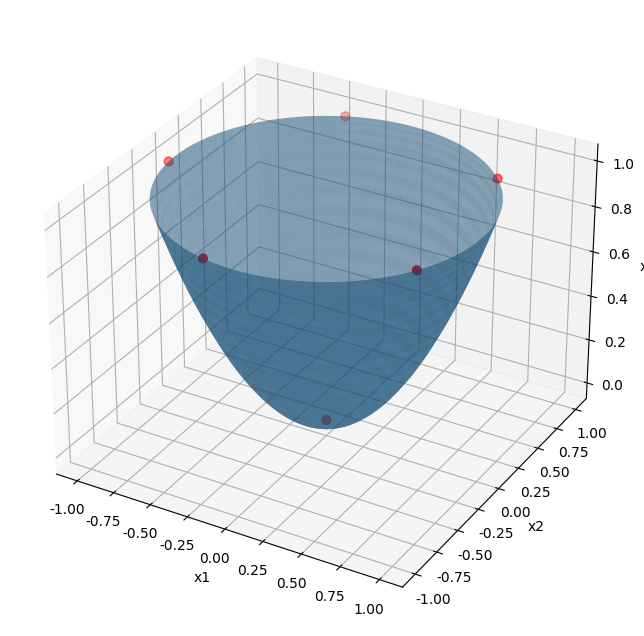

In [4]:
plot_results_3d(result, surface_func=lambda x1, x2: x1**2 + x2**2)

### Example 2: Design on the surface of a cone / nonlinear equality

We can also limit the design space to the surface of a cone, defined by the equality constraint $\sqrt{x_1^2 + x_2^2} - x_3 = 0$

Note that due to missing sampling methods in opti, the initial points provided to IPOPT don't satisfy the constraints.

In [5]:
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearEquality("(x1**2 + x2**2)**0.5 - x3", names=["x1","x2","x3"])],
)

result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 100})
result.round(3)

c:\users\walzds\code\bayesopt\doe\doe\design.py:112: UserWarning: Nonlinear constraints were detected. Not all features and checks are supported for this type of constraints.                 Using them can lead to unexpected behaviour.
  warnings.warn(
c:\users\walzds\code\bayesopt\doe\doe\design.py:150: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(
c:\users\walzds\code\bayesopt\doe\doe\design.py:171: UserWarning: Sampling failed. Falling back to uniform sampling on input domain.                          Providing a custom sampling strategy compatible with the problem can                           possibly improve performance.
  warnings.warn(


,x1,x2,x3
exp0,-0.000,0.000,-0.0
exp1,0.669,0.743,1.0
exp2,0.914,-0.407,1.0
exp3,0.000,-0.000,-0.0
exp4,-0.500,0.866,1.0
exp5,-0.978,-0.208,1.0
exp6,-0.104,-0.995,1.0


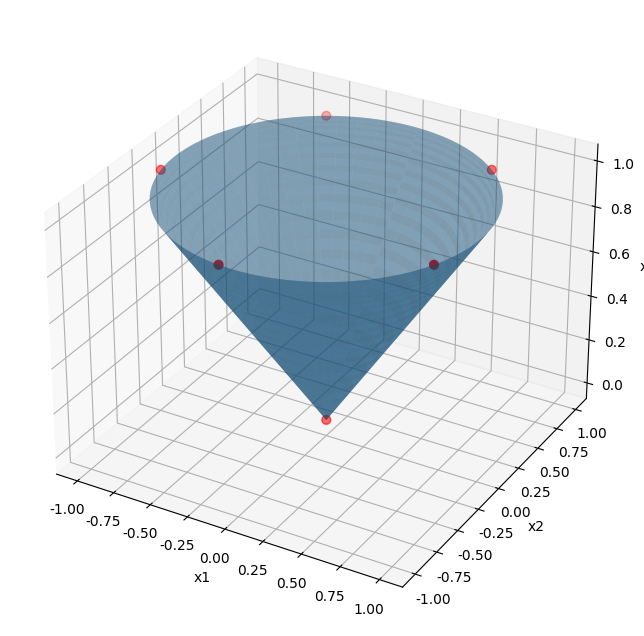

In [6]:
plot_results_3d(result, surface_func=lambda x1, x2: np.sqrt(x1**2 + x2**2))

### Example 3: Adding jacobians to nonlinear constraints

When no jacobian for the nonlinear constraints is provided it will be approximated by finite-difference methods. This can lead to several problems:
- significant increase of runtime due to more time consuming constraint jacobian evaluation
- numerical errors in constraint jacobian evaluation that can affect IPOPT's performance (in practice we find that the optimizer typically fails in case of multiple constraints (with at least one nonlinear constraint) when no jacobians are provided).
The following examples illustrate these problems and show the correct usage of `find_local_max_ipopt()`.

In [4]:
# long runtime in case of missing jacobian (10 variables)

from time import time
import warnings
n = 9


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    t = time()
    constraint_expression = "".join(["("]+ [f"x{i}**2 + " for i in range(n)])[:-3] + f")**0.5 - x{n}"
    denominator = constraint_expression[:-6]
    constraint_jacobian_expression = "".join(["["] + [f"x{i} / "+denominator+", " for i in range(n)] + ["-1]"])

    problem = opti.Problem(
        inputs=opti.Parameters(
            [
                opti.Continuous(f"x{i}", [-1, 1]) for i in range(n)
            ] + [opti.Continuous(f"x{n}", [0,1])]
        ),
        outputs=[opti.Continuous("y")],
        constraints=[opti.NonlinearInequality(constraint_expression, names=[f"x{i}" for i in range(n+1)], jacobian=constraint_jacobian_expression)],
    )

    result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 10})
    print("time per iteration with jacobian", np.round((time() - t)/10, 2), " s")


    t = time()
    problem = opti.Problem(
        inputs=opti.Parameters(
            [
                opti.Continuous(f"x{i}", [-1, 1]) for i in range(n)
            ] + [opti.Continuous(f"x{n}", [0,1])]
        ),
        outputs=[opti.Continuous("y")],
        constraints=[opti.NonlinearInequality(constraint_expression, names=[f"x{i}" for i in range(n+1)])],
    )

    result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 10})
    print("time per iteration without jacobian", np.round((time() - t)/10, 2), " s")

time per iteration with jacobian 0.34  s
time per iteration without jacobian 3.41  s


/home/aaron/Documents/doe/doe/design.py:109: UserWarning: Nonlinear constraints were detected. Not all features and checks are supported for this type of constraints.                 Using them can lead to unexpected behaviour. Please make sure to provide jacobians for nonlinear constraints.
  warnings.warn(
/home/aaron/Documents/doe/doe/design.py:145: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(
/home/aaron/Documents/doe/doe/design.py:297: UserWarning: Some constraints are violated in this design. Please check your results.
  warnings.warn(


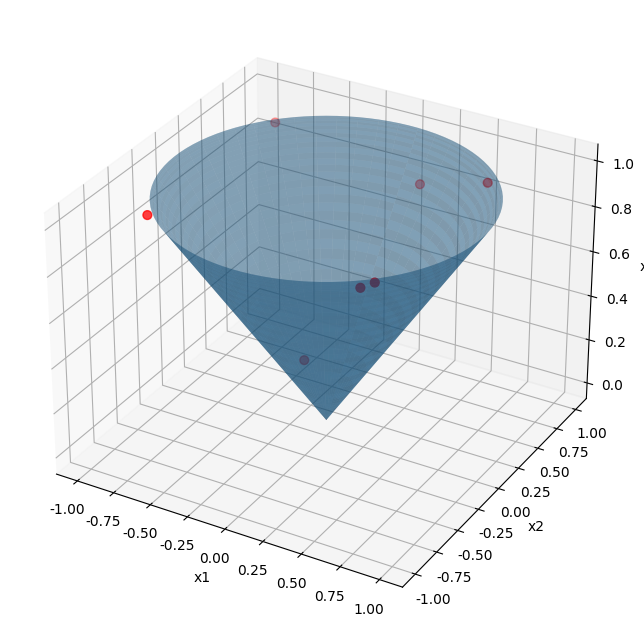

In [12]:
# IPOPT failing to find a good solution when jacobian not provided
# TODO: find out why this has such a severe impact...

problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearInequality("(x1**2 + x2**2)**0.5 - x3", names=["x1","x2","x3"]),
                 opti.NonlinearInequality("-x3-1", names=["x1","x2","x3"]) #this constraint is always fulfilled inside the domain.
                 ],
)

result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 100})
plot_results_3d(result, surface_func=lambda x1, x2: np.sqrt(x1**2 + x2**2))

/home/aaron/Documents/doe/doe/design.py:109: UserWarning: Nonlinear constraints were detected. Not all features and checks are supported for this type of constraints.                 Using them can lead to unexpected behaviour. Please make sure to provide jacobians for nonlinear constraints.
  warnings.warn(
/home/aaron/Documents/doe/doe/design.py:145: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(


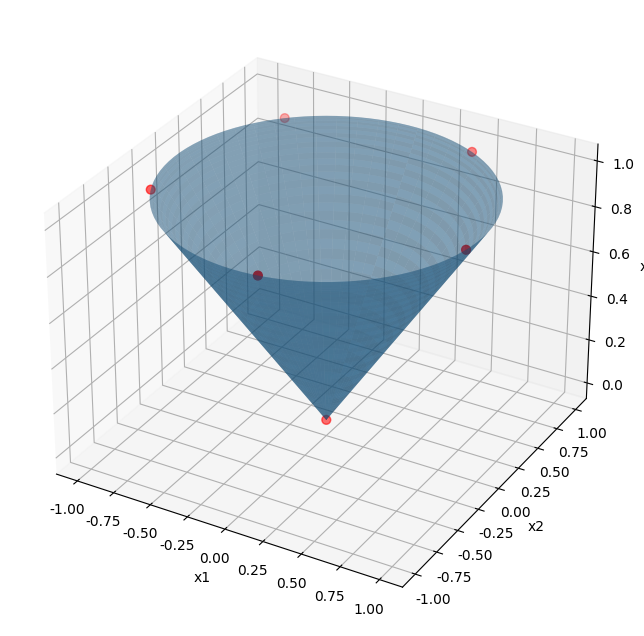

In [19]:
# IPOPT succeeding in the same task when a jacobian is provided
problem = opti.Problem(
    inputs=opti.Parameters(
        [
            opti.Continuous("x1", [-1, 1]),
            opti.Continuous("x2", [-1, 1]),
            opti.Continuous("x3", [0, 1]),
        ]
    ),
    outputs=[opti.Continuous("y")],
    constraints=[opti.NonlinearInequality("(x1**2 + x2**2)**0.5 - x3", names=["x1","x2","x3"], jacobian="[x1/(x1**2 + x2**2)**0.5,x2/(x1**2 + x2**2)**0.5,-1]"),
                 opti.NonlinearInequality("-x3-1", names=["x1","x2","x3"], jacobian="[0,0,-1]")
                 ],
)

result = find_local_max_ipopt(problem, "linear", ipopt_options={"maxiter": 100})
plot_results_3d(result, surface_func=lambda x1, x2: np.sqrt(x1**2 + x2**2))